In [1]:
import pandas as pd

In [2]:
# load pre-processed dataset
df = pd.read_csv('../../datasets/pre_processed_dataset.csv')
df.sample(3)

,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Item Name_Other,Item Name_amaranth,Item Name_apricot bao mushroom,Item Name_cabbage stem,Item Name_caidian quinoa artemisia,Item Name_caixin,Item Name_caixin,Item Name_changxianqie,...,Item Name_zhijiang qinggengsanhua,Item Name_zhijiang red bolt,Item Name_zhuyecai,Item Name_zhuyecai,Category Name_aquatic,Category Name_cabbage,Category Name_capsicum,Category Name_flower,Category Name_mushroom,Category Name_solanum
4312,0.449952,8.0,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
5016,0.358500,8.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
15610,1.000000,1.9,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [3]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

/Users/rumethsandinu/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [4]:
# define dependent and non dependent variables
y = df['Quantity Sold (kilo)']
x = df.drop(columns=['Quantity Sold (kilo)'], axis=1)

# split the dataset 0.8, 0.2, 0.1
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
x_eval, x_test, y_eval, y_test = train_test_split(x_temp, y_temp, test_size=0.3, random_state=42)

# convert to tensor arrays
x_train_tensor = tf.constant(x_train, dtype=tf.float32)
y_train_tensor = tf.constant(y_train, dtype=tf.float32)
x_eval_tensor = tf.constant(x_eval, dtype=tf.float32)
y_eval_tensor = tf.constant(y_eval, dtype=tf.float32)

x_train_tensor.shape, x_eval_tensor.shape, x_test.shape

2024-01-22 11:15:17.687665: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-01-22 11:15:17.687682: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-01-22 11:15:17.687687: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-01-22 11:15:17.687975: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-01-22 11:15:17.688243: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


(TensorShape([17228, 90]), TensorShape([5168, 90]), (2216, 90))

In [5]:
# save testing dataset
df_test = pd.concat([y_test.reset_index(drop=True), x_test.reset_index(drop=True)], axis=1)
df_test.to_csv('../../datasets/testing_dataset.csv')
df_test.sample(3)

,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Item Name_Other,Item Name_amaranth,Item Name_apricot bao mushroom,Item Name_cabbage stem,Item Name_caidian quinoa artemisia,Item Name_caixin,Item Name_caixin,Item Name_changxianqie,...,Item Name_zhijiang qinggengsanhua,Item Name_zhijiang red bolt,Item Name_zhuyecai,Item Name_zhuyecai,Category Name_aquatic,Category Name_cabbage,Category Name_capsicum,Category Name_flower,Category Name_mushroom,Category Name_solanum
144,0.472111,6.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1403,0.692300,8.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1538,0.111923,16.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [6]:
# convert to tensor arrays
x_test_tensor = tf.constant(x_test, dtype=tf.float32)
y_test_tensor = tf.constant(y_test, dtype=tf.float32)

In [7]:
# model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(90, activation='relu', input_shape=(x_train_tensor.shape[1],)))
model.add(tf.keras.layers.Reshape((1, 90))) 
model.add(tf.keras.layers.LSTM(64, return_sequences=True))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.LSTM(16))
model.add(tf.keras.layers.Dense(1, activation='linear'))

# compile model
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=1e-5), loss='mae', metrics=['mae'])

epoch_number = 50

# train model and get history
history = model.fit(x_train_tensor, y_train_tensor, epochs=epoch_number, validation_data=(x_eval_tensor, y_eval_tensor))

Epoch 1/50


2024-01-22 11:15:29.962867: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


539/539 [==============================] - 10s 16ms/step - loss: 0.3737 - mae: 0.3737 - val_loss: 0.3086 - val_mae: 0.3086
Epoch 2/50
539/539 [==============================] - 8s 15ms/step - loss: 0.2815 - mae: 0.2815 - val_loss: 0.2407 - val_mae: 0.2407
Epoch 3/50
539/539 [==============================] - 8s 15ms/step - loss: 0.2328 - mae: 0.2328 - val_loss: 0.2083 - val_mae: 0.2083
Epoch 4/50
539/539 [==============================] - 8s 15ms/step - loss: 0.2114 - mae: 0.2114 - val_loss: 0.1956 - val_mae: 0.1956
Epoch 5/50
539/539 [==============================] - 9s 16ms/step - loss: 0.2017 - mae: 0.2017 - val_loss: 0.1885 - val_mae: 0.1885
Epoch 6/50
539/539 [==============================] - 8s 15ms/step - loss: 0.1952 - mae: 0.1952 - val_loss: 0.1827 - val_mae: 0.1827
Epoch 7/50
539/539 [==============================] - 8s 15ms/step - loss: 0.1890 - mae: 0.1890 - val_loss: 0.1767 - val_mae: 0.1767
Epoch 8/50
539/539 [==============================] - 8s 14ms/step - loss: 0.18

In [8]:
import matplotlib.pyplot as plt

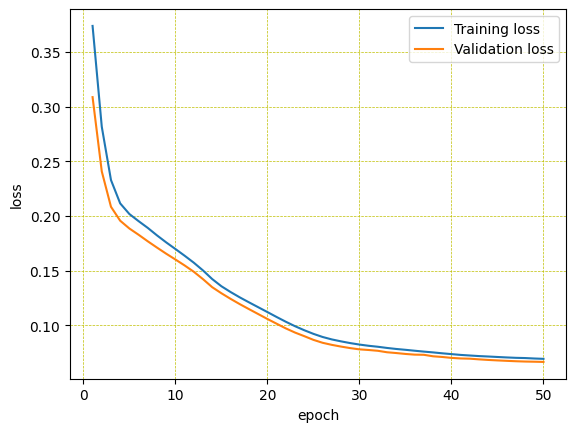

In [9]:
# plot loss with respect to epoch number
x_range = range(1, epoch_number + 1)
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(x_range, loss, label='Training loss')
plt.plot(x_range, val_loss, label='Validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.grid(True, linewidth = 0.5, color = 'y', linestyle = '--')

In [10]:
# final_model
final_model = tf.keras.Sequential()
final_model.add(tf.keras.layers.Dense(90, activation='relu', input_shape=(x_train_tensor.shape[1],)))
final_model.add(tf.keras.layers.Reshape((1, 90))) 
final_model.add(tf.keras.layers.LSTM(64, return_sequences=True))
final_model.add(tf.keras.layers.Dense(64, activation='relu'))
final_model.add(tf.keras.layers.LSTM(16))
final_model.add(tf.keras.layers.Dense(1, activation='linear'))

# compile model
final_model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=1e-5), loss='mae', metrics=['mae'])

epoch_number = 40

# train model and get history
history = final_model.fit(x_train_tensor, y_train_tensor, epochs=epoch_number, validation_data=(x_eval_tensor, y_eval_tensor))

Epoch 1/40
539/539 [==============================] - 10s 16ms/step - loss: 0.4532 - mae: 0.4532 - val_loss: 0.3565 - val_mae: 0.3565
Epoch 2/40
539/539 [==============================] - 8s 15ms/step - loss: 0.3183 - mae: 0.3183 - val_loss: 0.2699 - val_mae: 0.2699
Epoch 3/40
539/539 [==============================] - 8s 15ms/step - loss: 0.2528 - mae: 0.2528 - val_loss: 0.2215 - val_mae: 0.2215
Epoch 4/40
539/539 [==============================] - 8s 15ms/step - loss: 0.2214 - mae: 0.2214 - val_loss: 0.2032 - val_mae: 0.2032
Epoch 5/40
539/539 [==============================] - 8s 15ms/step - loss: 0.2086 - mae: 0.2086 - val_loss: 0.1943 - val_mae: 0.1943
Epoch 6/40
539/539 [==============================] - 8s 15ms/step - loss: 0.2010 - mae: 0.2010 - val_loss: 0.1880 - val_mae: 0.1880
Epoch 7/40
539/539 [==============================] - 8s 15ms/step - loss: 0.1952 - mae: 0.1952 - val_loss: 0.1831 - val_mae: 0.1831
Epoch 8/40
539/539 [==============================] - 8s 15ms/step -

In [11]:
final_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 90)                8190      
                                                                 
 reshape_1 (Reshape)         (None, 1, 90)             0         
                                                                 
 lstm_2 (LSTM)               (None, 1, 64)             39680     
                                                                 
 dense_4 (Dense)             (None, 1, 64)             4160      
                                                                 
 lstm_3 (LSTM)               (None, 16)                5184      
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 57231 (223.56 KB)
Trainable params: 5723

In [12]:
# view loss for testing values
final_model.evaluate(x_test_tensor, y_test_tensor)

70/70 [==============================] - 0s 7ms/step - loss: 0.0738 - mae: 0.0738


[0.07375426590442657, 0.07375426590442657]

In [13]:
# predict sample value set
y_predictions = final_model.predict(x_test_tensor)
y_predictions[:10]

70/70 [==============================] - 1s 5ms/step


array([[0.9869199 ],
       [0.21697824],
       [0.41806328],
       [0.18883885],
       [0.45642403],
       [0.39909342],
       [0.4934417 ],
       [0.29771116],
       [0.17828467],
       [0.27142707]], dtype=float32)

In [14]:
# view actual values
y_test_tensor[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([1.        , 0.167     , 0.54485714, 0.1935    , 0.8912    ,
       0.37516665, 0.41234782, 0.37771428, 0.219     , 0.25066668],
      dtype=float32)>

In [15]:
# save final model
final_model.save('sales_prediction_model')

INFO:tensorflow:Assets written to: sales_prediction_model/assets


INFO:tensorflow:Assets written to: sales_prediction_model/assets
